In [4]:
import torch
from micrograd.core import Value
import random

In [5]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

b = torch.Tensor([6.88137358]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b

o = torch.tanh(n)

print(o.data.item())

o.backward()

print('------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


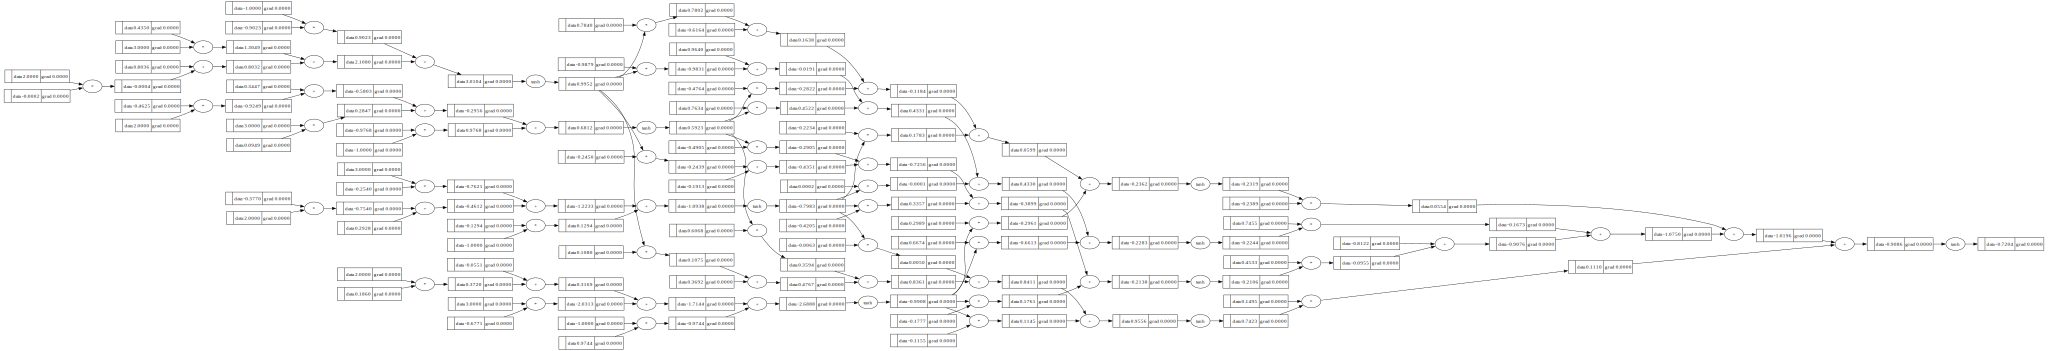

In [101]:
class Neuron:

    def __init__(self, nin):
        self.w = [ Value(random.uniform(-1, 1)) for _ in range(nin) ]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w*x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

x = [2.0, 3.0]
n = Neuron(2)
n(x)

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
 

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])

n(x).draw()

In [100]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]


In [76]:
ypred = [n(x) for x in xs]

loss = sum([(ygt - yout)**2 for ygt, yout in zip(ys, ypred)])

loss

Value(data=2.623734163432432)

In [87]:
ypred = [n(x) for x in xs]

loss = sum([(ygt - yout)**2 for ygt, yout in zip(ys, ypred)])

loss

Value(data=1.8206325215701384)

In [82]:
n.parameters()

[Value(data=-0.5889158828545427),
 Value(data=-0.4259384667266941),
 Value(data=-0.6159892274714402),
 Value(data=0.1872265915576774),
 Value(data=0.25938711315281093),
 Value(data=0.08929282002979488),
 Value(data=0.79192720965586),
 Value(data=0.7084881643319394),
 Value(data=-0.1536430525917305),
 Value(data=0.8772351829775413),
 Value(data=-0.25902597522463733),
 Value(data=0.6085370671721086),
 Value(data=-0.6379782511166032),
 Value(data=0.142978714213728),
 Value(data=0.8966193257104436),
 Value(data=0.2698940444772233),
 Value(data=-0.3770378928316984),
 Value(data=-0.5866595857974952),
 Value(data=-0.8519436369432265),
 Value(data=-0.443155309446996),
 Value(data=-0.4388676050236917),
 Value(data=0.7408438364047991),
 Value(data=0.7107687380580026),
 Value(data=-0.0197763371830475),
 Value(data=-0.9935080736510853),
 Value(data=0.5547298808170671),
 Value(data=0.21906717237666906),
 Value(data=0.3059538242987794),
 Value(data=0.25825507657159075),
 Value(data=0.702364066640973

In [80]:
loss.backward()

In [83]:
n.layers[0].neurons[0].w[0].grad

3.2881794257775936

In [84]:
n.layers[0].neurons[0].w[0].data

-0.5889158828545427

In [85]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [86]:
n.layers[0].neurons[0].w[0].data

-0.6217976771123186

In [131]:

for it in range(10):
    ypred = [n(x) for x in xs]
    loss = sum([(ygt - yout)**2 for ygt, yout in zip(ys, ypred)])
    
    print(f'Itr: {it+1} Loss: {loss}')

    for p in n.parameters():
        p.grad = 0
    
    loss.backward()
    
    for p in n.parameters():
        p.data += -0.01 * p.grad

Itr: 1 Loss: Value(data=0.006754250139843907)
Itr: 2 Loss: Value(data=0.006734536068060819)
Itr: 3 Loss: Value(data=0.006714932038652642)
Itr: 4 Loss: Value(data=0.006695437149367663)
Itr: 5 Loss: Value(data=0.006676050507687123)
Itr: 6 Loss: Value(data=0.0066567712306951)
Itr: 7 Loss: Value(data=0.006637598444950729)
Itr: 8 Loss: Value(data=0.006618531286362319)
Itr: 9 Loss: Value(data=0.006599568900063446)
Itr: 10 Loss: Value(data=0.006580710440291107)
Itr: 11 Loss: Value(data=0.0065619550702655845)
Itr: 12 Loss: Value(data=0.00654330196207247)
Itr: 13 Loss: Value(data=0.006524750296546315)
Itr: 14 Loss: Value(data=0.006506299263156204)
Itr: 15 Loss: Value(data=0.006487948059893081)
Itr: 16 Loss: Value(data=0.006469695893158852)
Itr: 17 Loss: Value(data=0.006451541977657116)
Itr: 18 Loss: Value(data=0.006433485536285751)
Itr: 19 Loss: Value(data=0.006415525800030988)
Itr: 20 Loss: Value(data=0.006397662007863191)
Itr: 21 Loss: Value(data=0.006379893406634293)
Itr: 22 Loss: Value(data

In [129]:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9514114582037487),
 Value(data=-0.9765429249104463),
 Value(data=-0.9433328995334219),
 Value(data=0.9419169203254161)]

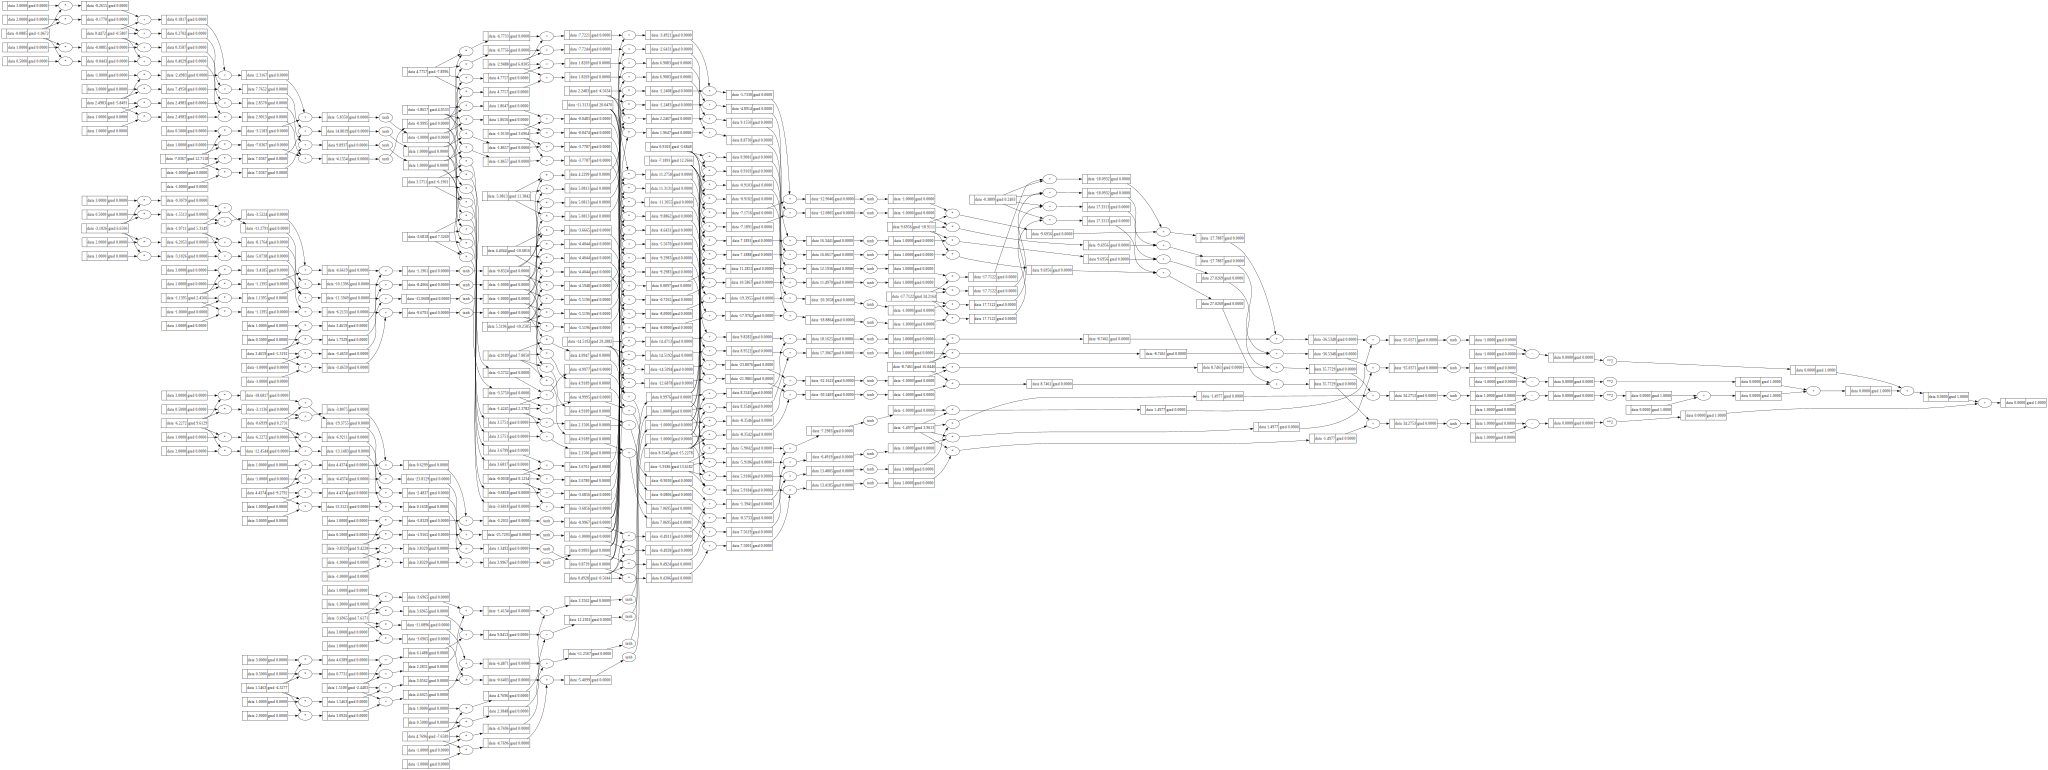

In [98]:
ypred = [n(x) for x in xs]
loss = sum([(ygt - yout)**2 for ygt, yout in zip(ys, ypred)])
loss.backward()
loss.draw()